# Gradient

Gradient skalárneho pola $f(x,y,z)$ vo zvolenom bode $(x,y,z)$ je definovaný ako vektor, udávajúci smer najväčšej zmeny skalárneho poľa a jeho veľkosť je úmerná tejto zmene. Všeobecný výpočet gradientu je definovaný ako 

\begin{equation}
\nabla f = \hat{i} \frac{\partial f}{\partial x} + \hat{j} \frac{\partial f}{\partial y} + \hat{k} \frac{\partial f}{\partial z}
\end{equation}

### Symbolický výpočet 

Pomocou knižnice *sympy* určime gradient skalárnej funkcie

\begin{equation*}
f(x,y) = (x^2 + y) \, \sin(y)
\end{equation*}

a jeho hodnotu v bode $(x,y)=(2,4)$.

In [1]:
%reset -f 
%matplotlib inline

from utils.utils import *
from sympy import *
from sympy.vector import CoordSys3D, gradient

r = CoordSys3D('r')
f = (r.x**2 + r.y) * sin(r.y)       # skalarna funkcia f(x,y) 
G = gradient(f)                     # vypocet gradientu

ltxprint(r'\nabla f(x,y)', G)

'$\\nabla f(x,y)=(2 \\mathbf{{x}_{r}} \\sin{\\left (\\mathbf{{y}_{r}} \\right )})\\mathbf{\\hat{i}_{r}} + (\\left(\\mathbf{{x}_{r}}^{2} + \\mathbf{{y}_{r}}\\right) \\cos{\\left (\\mathbf{{y}_{r}} \\right )} + \\sin{\\left (\\mathbf{{y}_{r}} \\right )})\\mathbf{\\hat{j}_{r}}$'

Výpočet zložiek vektora gradientu v bode $(x,y)=(2,4)$

In [2]:
gxy = G.subs([(r.x, 2), (r.y, 4)])
print('Grad f(2,4) = {0} {1}'.format(gxy, gxy.evalf(3)))

Grad f(2,4) = (4*sin(4))*r.i + (8*cos(4) + sin(4))*r.j (-3.03)*r.i + (-5.99)*r.j


### Vizualizácia

V *numpy* je možné pre výpočet gradientu n-rozmernej skalárnej funkcie použiť funkciu *gradient()*. Funkcia vráti vektorové pole, ktoré môžeme v 2D zobraziť pomocou funkcie *quiver()*, šipky smerujú v smere stúpajúcej hodnoty. 

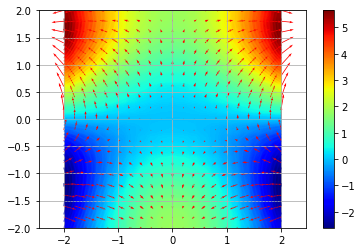

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np                    

dx = np.arange(-2, 2.2, .2)                    
dy = np.arange(-2, 2.2, .2)
x,y = np.meshgrid(dx, dy)              # pole hodnot (x,y)

fn = (x**2 + y) * np.sin(y)                  
gy, gx = np.gradient(fn)

fig = plt.figure() 
ax = fig.add_subplot(111)

ax.quiver(x, y, gx, gy, color='r')
cnt=ax.contour(x, y, fn, 50, alpha=0.5, cmap='jet') 
img = ax.imshow(fn, extent=[-2, 2, -2, 2], origin='lower', interpolation='kaiser', 
                 clip_on=True, alpha=1.0, cmap='jet') 
fig.colorbar(img)
plt.axis('equal')
plt.grid()
plt.show()